In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load your dataset (replace '/content/drive/MyDrive/dataset_3.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/dataset_3.csv')

# Display basic info about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  feature_11  1000 non-null   float64
 11  feature_12  1000 non-null   float64
 12  feature_13  1000 non-null   float64
 13  feature_14  1000 non-null   float64
 14  feature_15  1000 non-null   float64
 15  feature_16  1000 non-null   float64
 16  feature_17  1000 non-null   float64
 17  target      1000 non-null   object 
dtypes: float64(17), object(1)
memory usage: 140.8+ KB
None
   feature_1  

In [ ]:
# Encode the categorical target into numerical values
encoder = LabelEncoder()
data['target_encoded'] = encoder.fit_transform(data['target'])

# Check the encoded values
print(encoder.classes_)
print(data[['target', 'target_encoded']].head())


['cheetah' 'jaguar' 'leopard' 'lion' 'tiger']
    target  target_encoded
0  cheetah               0
1    tiger               4
2   jaguar               1
3  leopard               2
4  leopard               2


In [ ]:
# Drop the original target column to form the feature matrix
X = data.drop(columns=['target', 'target_encoded'])
y = data['target_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.9268506169897449
R-squared: 0.2669640802042511


<ipython-input-7-af6416464326>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['target'], order=data['target'].value_counts().index, palette="viridis")


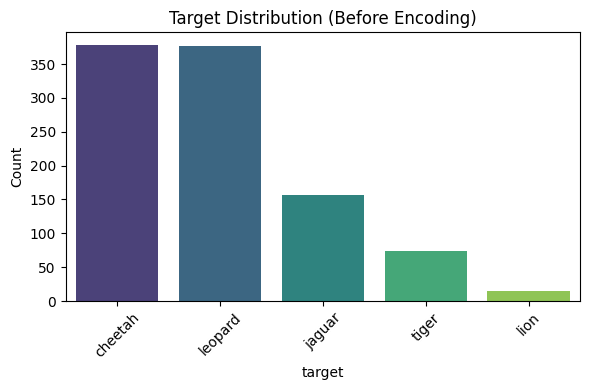

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['target'], order=data['target'].value_counts().index, palette="viridis")
plt.title("Target Distribution (Before Encoding)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



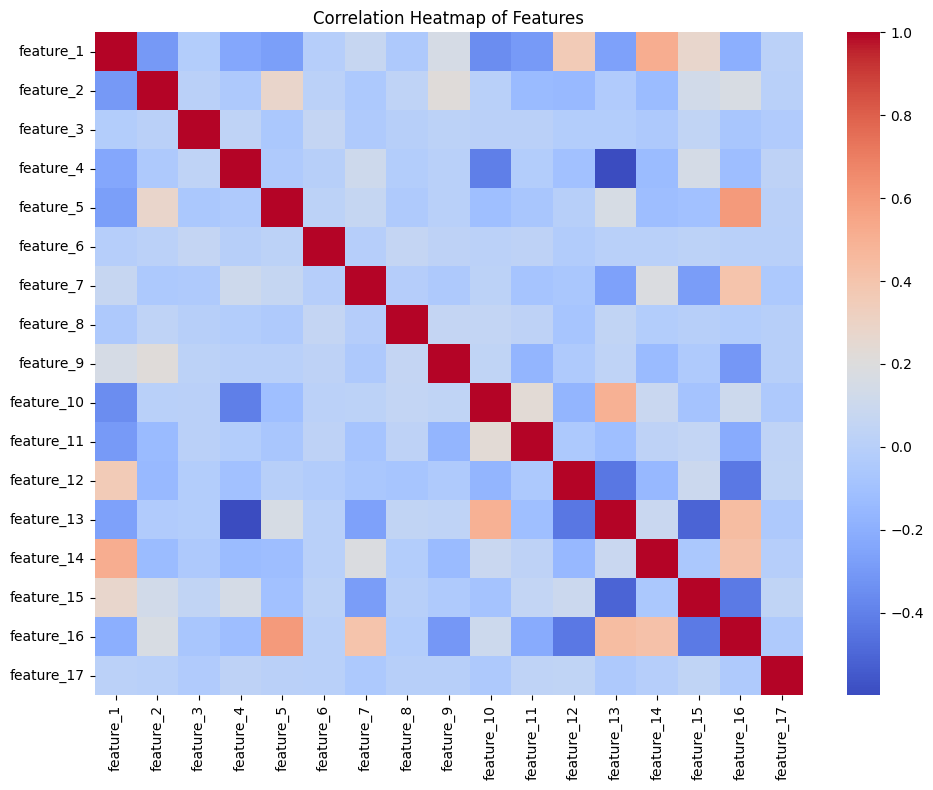

In [ ]:
plt.figure(figsize=(10, 8))
correlation = X.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


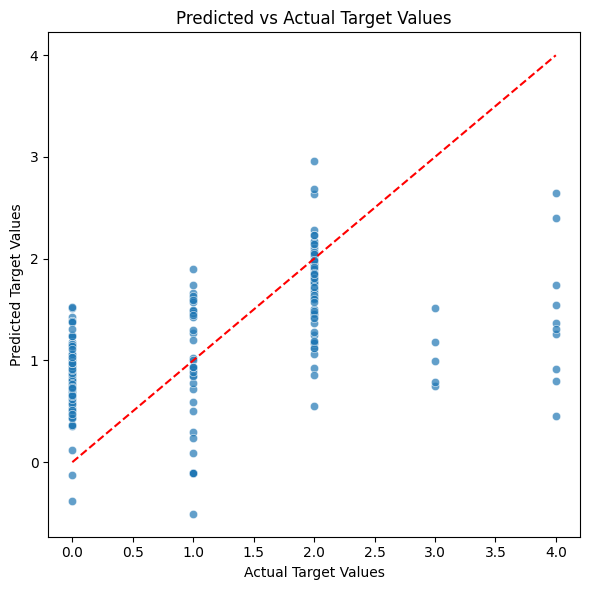

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs Actual Target Values")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.tight_layout()
plt.show()


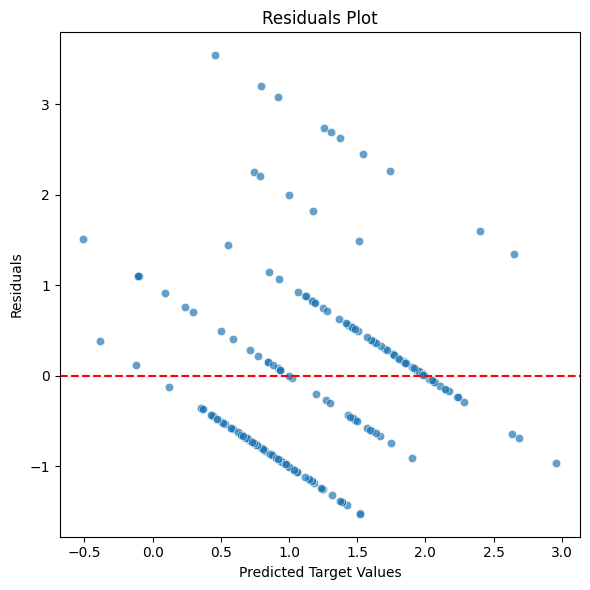

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Target Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


<ipython-input-11-0cb576d57204>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


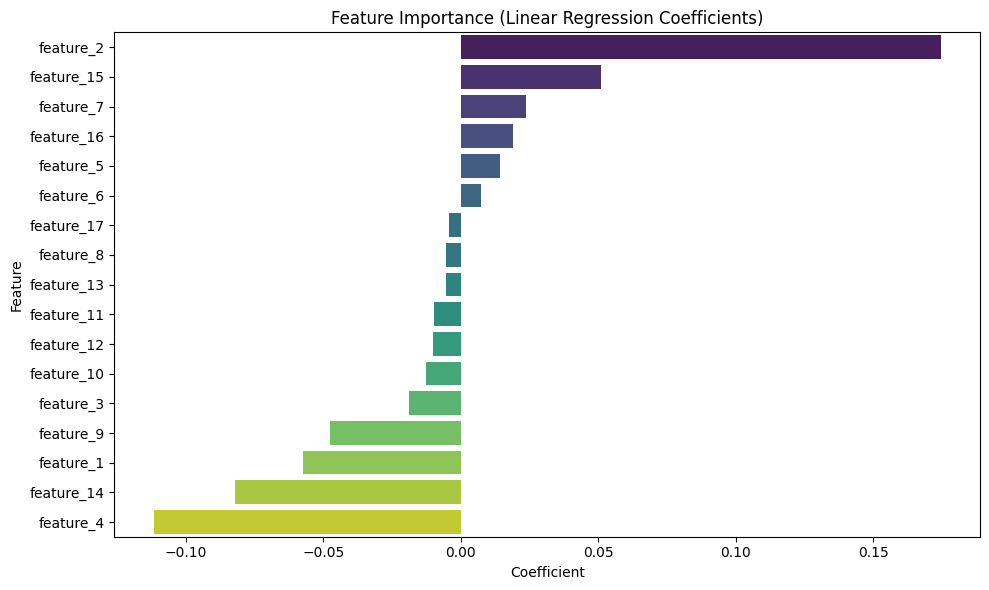

In [ ]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.tight_layout()
plt.show()


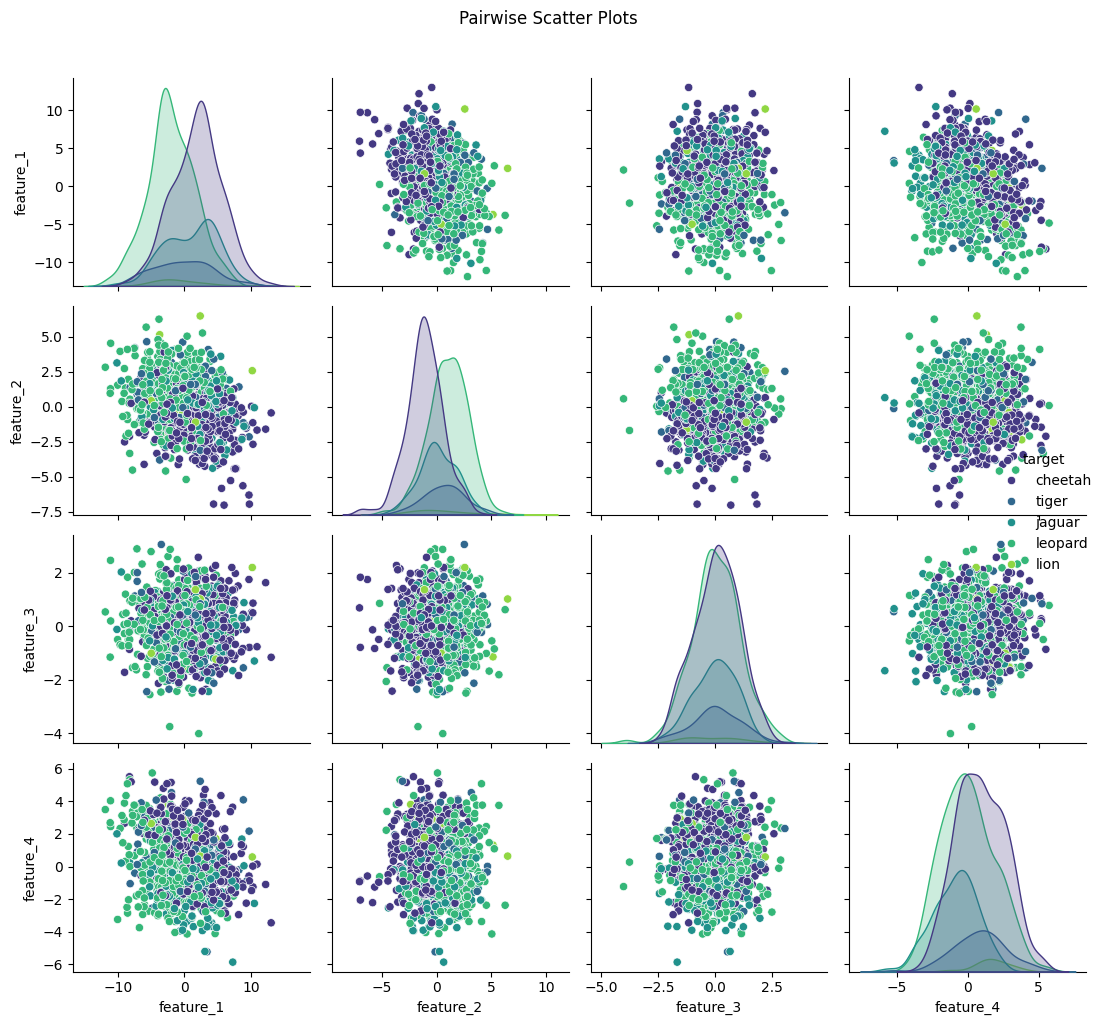

In [ ]:
sns.pairplot(data, vars=X.columns[:4], hue='target', palette='viridis')
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.tight_layout()
plt.savefig("pairwise_scatter.png")
plt.show()


<ipython-input-14-1c4c90038975>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['target'], y=data[selected_feature], palette="viridis")


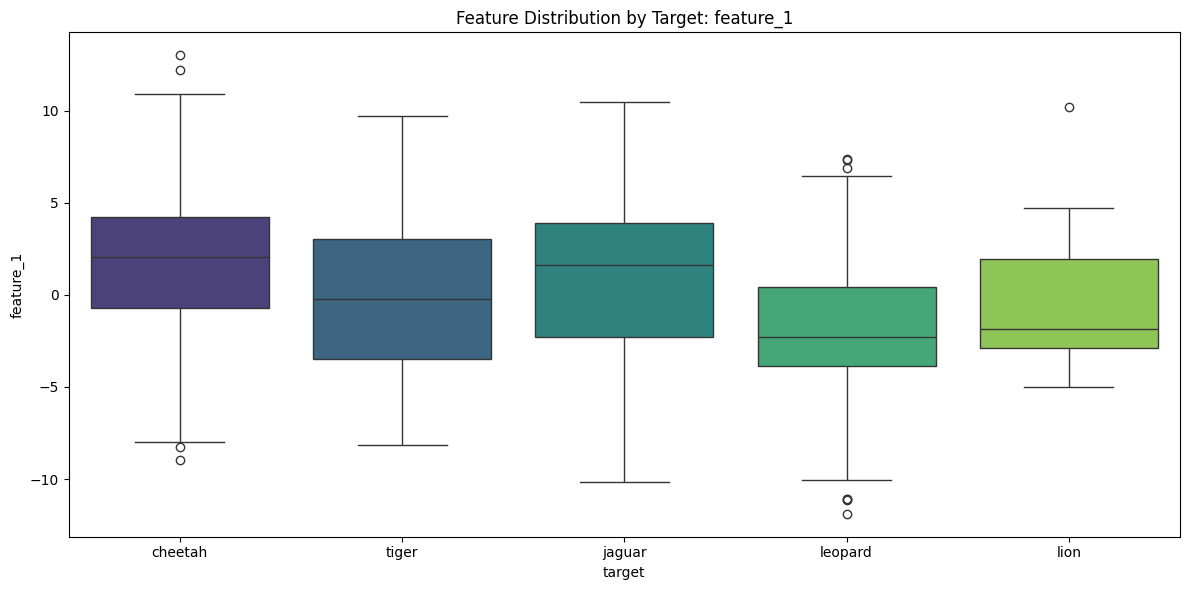

In [ ]:
selected_feature = X.columns[0]  # Choose one feature
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['target'], y=data[selected_feature], palette="viridis")
plt.title(f"Feature Distribution by Target: {selected_feature}")
plt.tight_layout()
plt.savefig("feature_boxplot.png")
plt.show()
